# Modèle Naive Bayes

par Ali

## 1. Télechargement des packages nécessaires

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc

## 2. Importation des ensembles d'entraînement et de test (validation croisée)

In [11]:
with open('variables.pkl', 'rb') as f:
    (df, X_train, X_test, y_train, y_test,X_train_smote, y_train_smote) = pickle.load(f)

In [12]:
print(df.columns)

Index(['comportement_risqueSexuel', 'comportement_alimentation',
       'comportement_hygienePersonnelle', 'intention_aggrégation',
       'intention_engagement', 'attitude_cohérence', 'attitude_spontanéité',
       'norme_personneImportante', 'norme_accomplissement',
       'perception_vulnérabilité', 'perception_sévérité', 'motivation_force',
       'motivation_volonté', 'soutienSocial_émotionnel',
       'soutienSocial_appréciation', 'soutienSocial_instrumental',
       'autonomisation_connaissance', 'autonomisation_compétences',
       'autonomisation_désirs', 'cancer_colUterus'],
      dtype='object')


In [13]:
print(df.shape)

(72, 20)


## 3. Naive Bayes


 GaussianNB - Accuracy: 1.00
 Rapport de Classification :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00         4

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15

 Matrice de Confusion :
 [[11  0]
 [ 0  4]]

 BernoulliNB - Accuracy: 0.73
 Rapport de Classification :
               precision    recall  f1-score   support

           0       0.73      1.00      0.85        11
           1       0.00      0.00      0.00         4

    accuracy                           0.73        15
   macro avg       0.37      0.50      0.42        15
weighted avg       0.54      0.73      0.62        15

 Matrice de Confusion :
 [[11  0]
 [ 4  0]]

 MultinomialNB - Accuracy: 0.80
 Rapport de Classification :
               precision    recall  f1-score   support

           0       

D:\Program Files\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
D:\Program Files\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
D:\Program Files\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


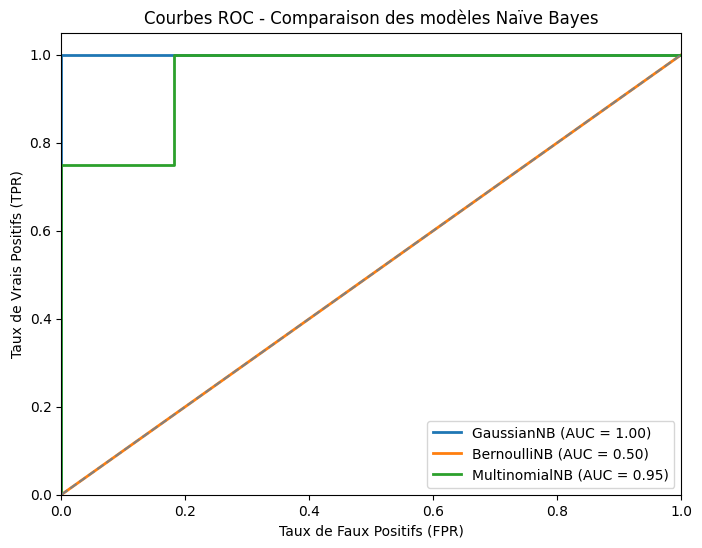

In [14]:
#Initialisation des modèles Naïve Bayes
models = {
    "GaussianNB": GaussianNB(),
    "BernoulliNB": BernoulliNB(),
    "MultinomialNB": MultinomialNB()
}

#Entraînement et évaluation des modèles
results = {}

for name, model in models.items():
    model.fit(X_train_smote, y_train_smote)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]

    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)

    # Calcul de la courbe ROC
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)

    results[name] = {
        "accuracy": accuracy,
        "classification_report": report,
        "confusion_matrix": conf_matrix,
        "fpr": fpr,
        "tpr": tpr,
        "auc": roc_auc
    }

    print(f"\n {name} - Accuracy: {accuracy:.2f}")
    print(" Rapport de Classification :\n", report)
    print(" Matrice de Confusion :\n", conf_matrix)

# Affichage des courbes ROC
plt.figure(figsize=(8,6))
for name, res in results.items():
    plt.plot(res["fpr"], res["tpr"], lw=2, label=f'{name} (AUC = {res["auc"]:.2f})')

plt.plot([0, 1], [0, 1], color='grey', linestyle='--')  # Diagonale
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taux de Faux Positifs (FPR)')
plt.ylabel('Taux de Vrais Positifs (TPR)')
plt.title('Courbes ROC - Comparaison des modèles Naïve Bayes')
plt.legend(loc="lower right")
plt.show()

## 4. Exporter les variables

In [15]:
roc_data_NB = {
    'fpr': fpr,
    'tpr': tpr,
    'roc_auc': roc_auc
}

# Sauvegarder les données dans un fichier pickle
with open('roc_data_NB.pkl', 'wb') as file:
    pickle.dump(roc_data_NB, file)

print("Les données ROC et AUC ont été enregistrées avec succès dans 'roc_data_NB.pkl'.")

Les données ROC et AUC ont été enregistrées avec succès dans 'roc_data_NB.pkl'.
